In [2]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_adversarial_examples_by_id, load_posterior_samples_by_id
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

import torch 
import numpy as np

torch.manual_seed(0)

In [7]:
name = "benchmark"

In [8]:
base_fig_size = 2.5

In [9]:
colors = ["#08519c", "#d94801", "black", "darkred"]

Following data row is used:
Id: c8c42888-c93e-428e-a860-0bcf7203d3e4, Task: sir, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =07aed1e9-397f-4739-a8f9-5349aba18acf, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


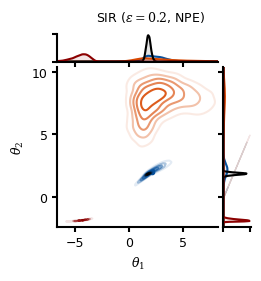

In [17]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", eps=0.2, idx_adv_example=0,  plot_true=["x","x_tilde"],
                                            N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",type="2djointplot",
                                            plotting_kwargs={"bins": 400, "colors":colors, "labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(base_fig_size, base_fig_size)})
    fig.suptitle(r"SIR ($\epsilon=0.2$, NPE)")
    
    axes[-2].set_ylim(0,2)
    fig.savefig("sir_strong_attack_misspecification.svg")

Following data row is used:
Id: 8324499b-f6f5-4680-bf18-09779452d2c1, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =a70e5bf0-f326-433a-b125-7c20b5f11af4, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


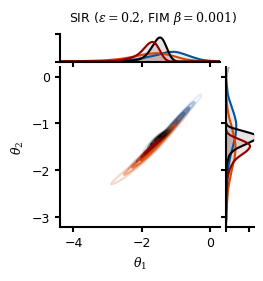

In [27]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", defense="FIMTraceRegularizer" ,eps=0.2, params_defense_beta=0.001,type="2djointplot", idx_adv_example=0, plot_true=["x", "x_tilde"],
                                            N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                            plotting_kwargs={"colors":colors, "bins": 400,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(base_fig_size, base_fig_size)})
    fig.suptitle(r"SIR ($\epsilon=0.2$, FIM $\beta=0.001$)")
    
    axes[-2].set_ylim(0,2)
    fig.savefig("sir_strong_attack_misspecification_FIM.svg")

Following data row is used:
Id: c8c42888-c93e-428e-a860-0bcf7203d3e4, Task: sir, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =07aed1e9-397f-4739-a8f9-5349aba18acf, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


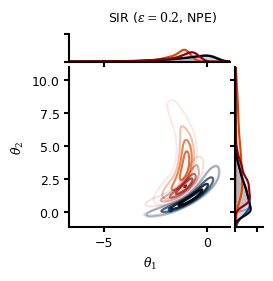

In [25]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", eps=0.2, idx_adv_example=4245,  plot_true=["x","x_tilde"],type="2djointplot",
                                            N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                            plotting_kwargs={"bins": 400, "colors":colors, "labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(base_fig_size, base_fig_size)})
    fig.suptitle(r"SIR ($\epsilon=0.2$, NPE)")
    
    axes[-2].set_ylim(0,2)
    fig.savefig("sir_weak_attack.svg")

Following data row is used:
Id: 8324499b-f6f5-4680-bf18-09779452d2c1, Task: sir, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =a70e5bf0-f326-433a-b125-7c20b5f11af4, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


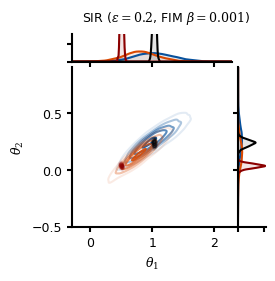

In [26]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="sir", model_name="maf", defense="FIMTraceRegularizer" ,eps=0.2, params_defense_beta=0.001, idx_adv_example=4245, plot_true=["x", "x_tilde"],
                                            N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",type="2djointplot",
                                            plotting_kwargs={"colors":colors, "bins": 400,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(base_fig_size, base_fig_size)})
    fig.suptitle(r"SIR ($\epsilon=0.2$, FIM $\beta=0.001$)")
    
    axes[-2].set_ylim(0,4)
    fig.savefig("sir_weak_attack_FIM.svg")

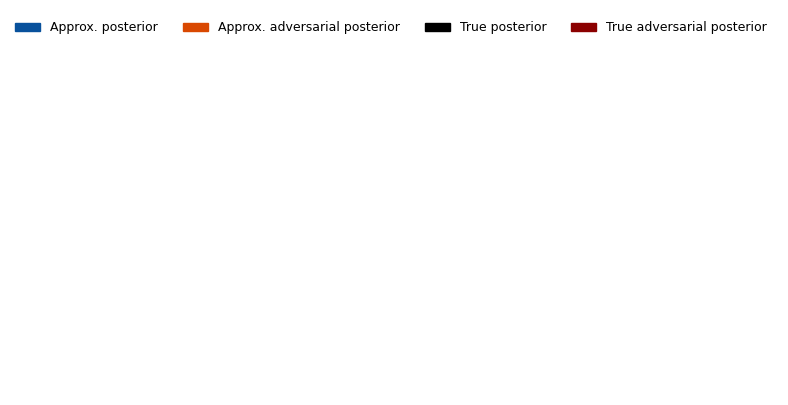

In [29]:
from matplotlib.patches import Patch
with use_style("pyloric"):
    legend_elements = [Patch(facecolor=colors[0], edgecolor=colors[0],
                            label='Approx. posterior'), Patch(facecolor=colors[1], edgecolor=colors[1],
                            label='Approx. adversarial posterior'),Patch(facecolor=colors[2], edgecolor=colors[2],
                            label='True posterior'),Patch(facecolor=colors[3], edgecolor=colors[3],
                            label='True adversarial posterior')]
    fig = plt.figure(figsize=(2*base_fig_size, 2*base_fig_size))
    plt.legend(handles=legend_elements, ncol=4)
    plt.axis("off")
    fig.savefig("legend.svg")

Following data row is used:
Id: 9807e042-15fa-4bca-a1b4-577eccaa0a07, Task: vae_task, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =f0f29d8b-bbb2-48f5-93b1-563595f356a2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


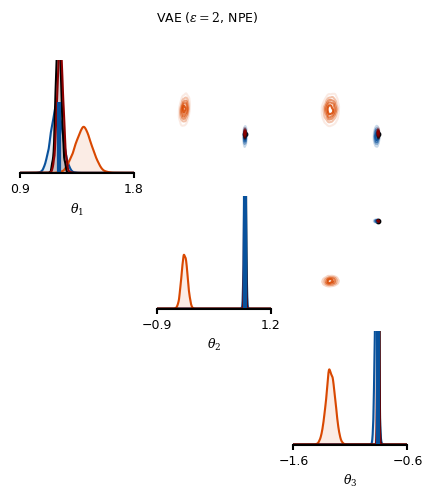

In [30]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="vae_task", model_name="maf", eps=2., idx_adv_example=2,  plot_true=["x","x_tilde"],
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"bins": 200, "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 2*base_fig_size)})
    fig.suptitle(r"VAE ($\epsilon=2.$, NPE)")
    
    axes[0,0].set_ylim(0, 15)
    axes[1,1].set_ylim(0, 15)
    axes[-1,-1].set_ylim(0, 15)
    fig.savefig("vae.svg")

Following data row is used:
Id: 1605bde5-fe55-4873-b056-9ead55ba7d36, Task: vae_task, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =97567689-8dbb-4a79-9487-d4e0efd028d2, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


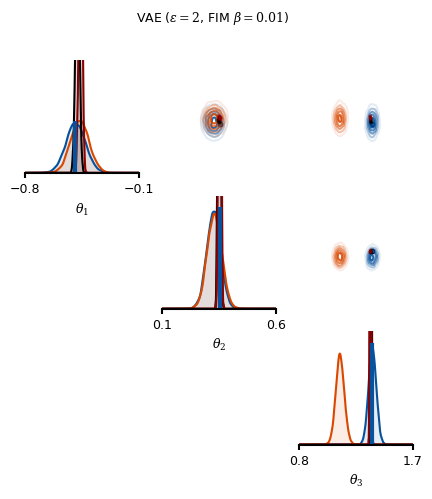

In [31]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="vae_task", model_name="maf", defense="FIMTraceRegularizer" ,eps=2., params_defense_beta=0.01, idx_adv_example=2, plot_true=["x", "x_tilde"],
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"colors":colors, "bins": 200,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 2*base_fig_size)})
    fig.suptitle(r"VAE ($\epsilon=2.$, FIM $\beta=0.01$)")
    
    axes[0,0].set_ylim(0, 15)
    axes[1,1].set_ylim(0, 15)
    axes[-1,-1].set_ylim(0, 15)
    fig.savefig("vae_fim.svg")

Following data row is used:
Id: 7c497b3c-77b2-4688-8bc8-bc70ec91f068, Task: lotka_volterra, Model: maf, Defense: None, Loss: NLLLoss, N_train: 100000, Id adversarial =11b95de1-bbcb-4b85-9882-d3a67649546b, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


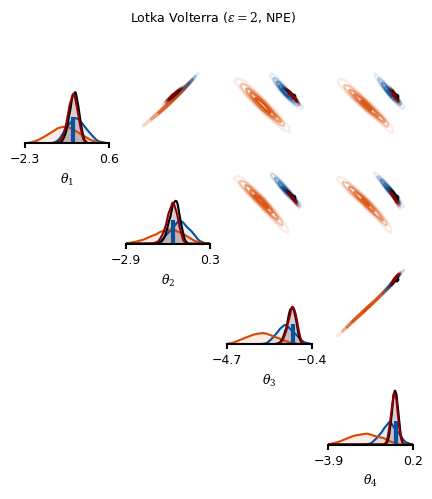

In [12]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="lotka_volterra", model_name="maf", eps=2., idx_adv_example=2,  plot_true=["x","x_tilde"],
                                            N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                            plotting_kwargs={"bins": 200, "colors": colors, "labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 2*base_fig_size)})
    fig.suptitle(r"Lotka Volterra ($\epsilon=2.$, NPE)")
    
    axes[0,0].set_ylim(0, 4)
    axes[1,1].set_ylim(0, 4)
    axes[2,2].set_ylim(0, 4)
    axes[-1,-1].set_ylim(0, 4)
    fig.savefig("lv_npe.svg")

Following data row is used:
Id: 3c286911-3508-436d-977f-4b828e53427c, Task: lotka_volterra, Model: maf, Defense: FIMTraceRegularizer, Loss: NLLLoss, N_train: 100000, Id adversarial =d6389b3d-064a-4e21-9b9c-3109665481b8, Attack:L2PGDAttack,Attack loss_fn:ReverseKLLoss, Metric: ReverseKLRobMetric 


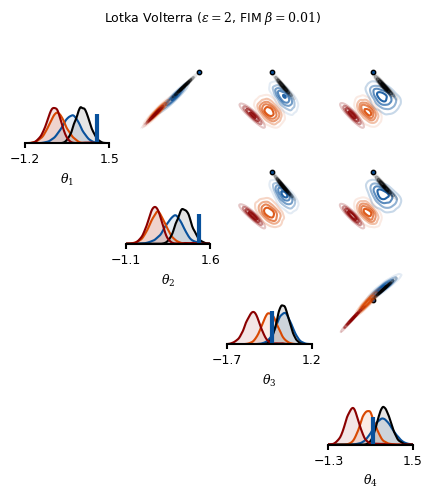

In [13]:
with use_style("pyloric"):
    fig, axes = plot_adversarial_posterior(name, task="lotka_volterra", model_name="maf", defense="FIMTraceRegularizer" ,eps=2., params_defense_beta=0.01, idx_adv_example=2, plot_true=["x", "x_tilde"],
                                           N_train=100000, n_samples=10000, metric_rob="ReverseKLRobMetric",attack="L2PGDAttack",
                                           plotting_kwargs={"colors":colors, "bins": 100,"labels":[r"$\theta_1$", r"$\theta_2$",r"$\theta_3$",r"$\theta_4$"], "figsize":(2*base_fig_size, 2*base_fig_size)})
    fig.suptitle(r"Lotka Volterra ($\epsilon=2.$, FIM $\beta = 0.01$)")
    
    axes[0,0].set_ylim(0, 4)
    axes[1,1].set_ylim(0, 4)
    axes[2,2].set_ylim(0, 4)
    axes[-1,-1].set_ylim(0, 4)
    fig.savefig("lv_fim.svg")